<a href="https://colab.research.google.com/github/NehaBhatia103/DataScienceAssignments/blob/main/AssignmentLogisticRegressionBankData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving bank-full.csv to bank-full.csv


In [ ]:
data=pd.read_csv("bank-full.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.shape

(45211, 17)

In [ ]:
data.isnull().sum() # no null value found


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
data[data.duplicated()]  # no duplicates found

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [ ]:
corr=data.corr()
corr

<ipython-input-8-0d3ae1d0be10>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: >

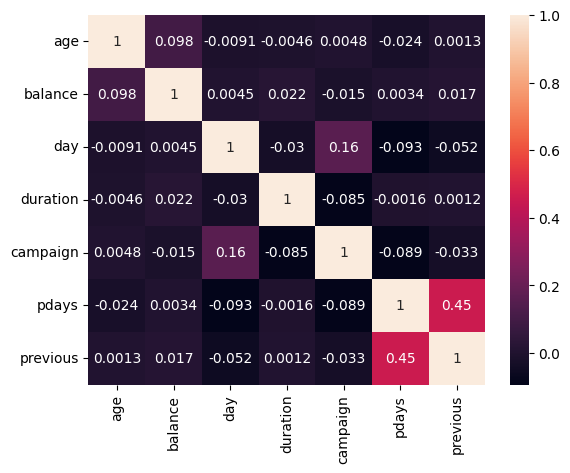

In [ ]:
sns.heatmap(corr,annot=True)

#Finding outliers

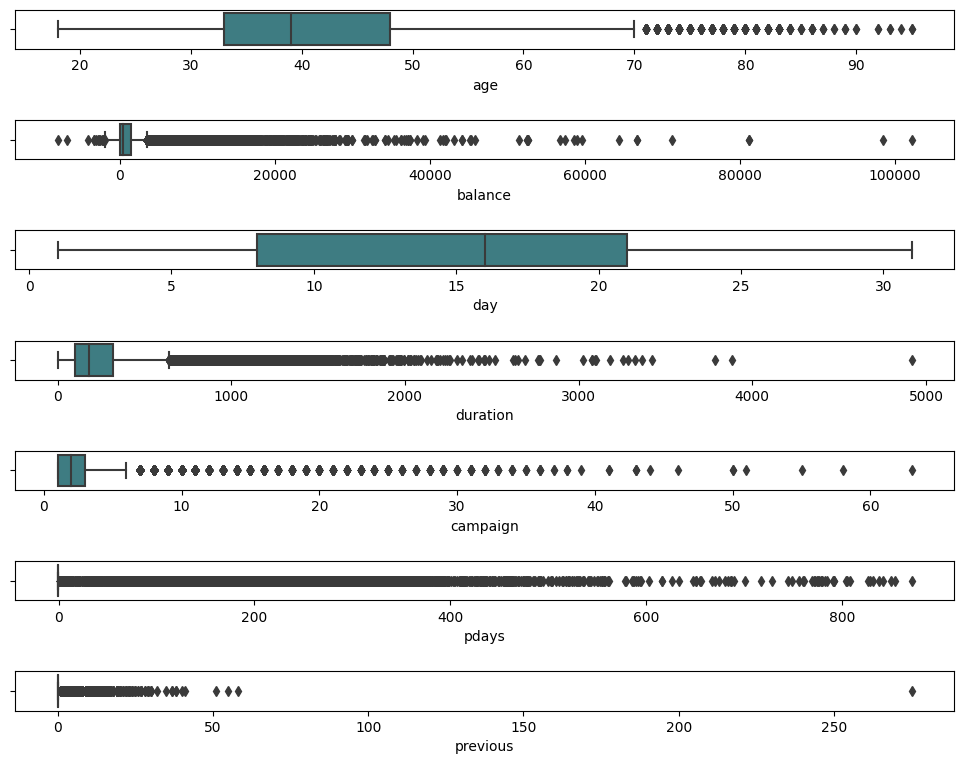

In [ ]:
fig, axes = plt.subplots(7,1,figsize=(10,8), sharex=False, sharey=False)
sns.boxplot(x='age',data=data,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=data,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=data,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=data,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=data,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=data,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=data,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

There are a lot of outliers present in the dataframe but we cannot drop them as they are present in large quantity

In [ ]:
data[['job','marital','education','default','housing','loan','contact','poutcome','month','y']] = data[
    ['job','marital','education','default','housing','loan','contact','poutcome','month','y']].astype('category')
data_new = data

In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [ ]:
data_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Pre processing of columns with data type "Object"

In [ ]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()

data_new["job"]=LabelEncoder.fit_transform(data_new["job"])
data_new["marital"]=LabelEncoder.fit_transform(data_new["marital"])
data_new["education"]=LabelEncoder.fit_transform(data_new["education"])
data_new["default"]=LabelEncoder.fit_transform(data_new["default"])
data_new["housing"]=LabelEncoder.fit_transform(data_new["housing"])
data_new["loan"]=LabelEncoder.fit_transform(data_new["loan"])
data_new["contact"]=LabelEncoder.fit_transform(data_new["contact"])
data_new["month"]=LabelEncoder.fit_transform(data_new["month"])
data_new["poutcome"]=LabelEncoder.fit_transform(data_new["poutcome"])
data_new["y"]=LabelEncoder.fit_transform(data_new["y"])

In [ ]:
data_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


dividing data into dependent and independent Variables.

In [ ]:
x=data_new.iloc[:,:-1]
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [ ]:
y=data_new.iloc[:,16]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [ ]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,1,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,1,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,1,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=12)
print("Shape of X_train : ",x_train.shape)
print("Shape of X_test  : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (36168, 16)
Shape of X_test  :  (9043, 16)
Shape of y_train :  (36168,)
Shape of y_test  :  (9043,)


In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
logistic_model.coef_

array([[-2.38915708e-02,  1.59597446e-02, -1.11382518e-01,
        -1.68375804e-02, -5.34140437e-03,  3.56048792e-05,
        -2.19088837e-01, -6.56146892e-02, -2.25556759e-01,
        -1.97718262e-02, -6.34731132e-02,  3.49815048e-03,
        -3.20316792e-01, -9.64775977e-04,  1.31215675e-01,
        -2.13369664e-01]])

In [ ]:
logistic_model.intercept_

array([-0.08474103])

Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range= (0,1))
scalar.fit(data_new)
scaled_x = scalar.transform(data_new)
scaled_x

array([[0.51948052, 0.36363636, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.33766234, 0.81818182, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19480519, 0.18181818, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.7012987 , 0.45454545, 0.5       , ..., 0.01090909, 0.66666667,
        1.        ],
       [0.50649351, 0.09090909, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.24675325, 0.18181818, 0.5       , ..., 0.04      , 0.33333333,
        0.        ]])

In [ ]:
classifier1 = LogisticRegression()
classifier1.fit(scaled_x,y)

LogisticRegression()

In [ ]:
classifier1.coef_

array([[ 0.0870051 ,  0.04775924,  0.12651324,  0.16252677, -0.0576052 ,
         0.03974224, -0.34339486, -0.23072377, -0.46707242, -0.10404694,
         0.124258  ,  0.90757706, -0.1296082 ,  0.21393142,  0.01923177,
        -0.1480058 , 13.73203525]])

In [ ]:
proba1 = classifier1.predict_proba(scaled_x)
proba1

array([[9.99760781e-01, 2.39218924e-04],
       [9.99762234e-01, 2.37766449e-04],
       [9.99832546e-01, 1.67453699e-04],
       ...,
       [1.67888481e-03, 9.98321115e-01],
       [9.99598875e-01, 4.01125023e-04],
       [9.99437111e-01, 5.62889153e-04]])

In [ ]:
y_pred1 = classifier1.predict(scaled_x)
y_pred1

array([0, 0, 0, ..., 1, 0, 0])

# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
y_pred_train1 = logistic_model.predict(x_train)
print(confusion_matrix(y_train, y_pred_train1))

[[31349   580]
 [ 3506   733]]


In [ ]:
print(classification_report(y_train,y_pred_train1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31929
           1       0.56      0.17      0.26      4239

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [ ]:
accuracy_score(y_train,y_pred_train1)

0.8870272063702721

# ROC Curve

AUC score : 81.62%


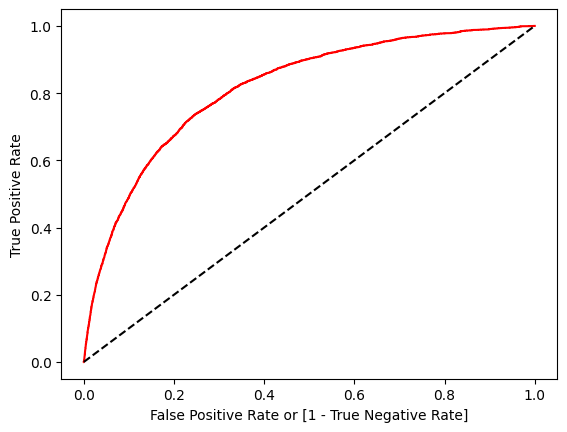

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train,logistic_model.predict_proba (x_train)[:,1])

auc = roc_auc_score(y_train,logistic_model.predict_proba (x_train)[:,1])
print('AUC score : {:.2f}%'.format(auc*100))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
classification_report1 = classification_report(y_train,y_pred_train1)
print(classification_report1)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31929
           1       0.56      0.17      0.26      4239

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [ ]:
y_pred_test1 = logistic_model.predict(x_test)
print(confusion_matrix(y_test,y_pred_test1))

[[7850  143]
 [ 853  197]]


In [ ]:
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.58      0.19      0.28      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [ ]:
accuracy_score(y_test,y_pred_test1)

0.8898595598805706

##AUC Curve

AUC score : 83.00%


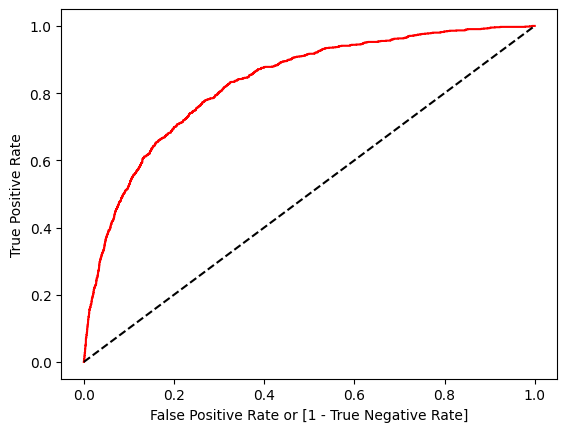

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,logistic_model.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_test,logistic_model.predict_proba (x_test)[:,1])
print('AUC score : {:.2f}%'.format(auc*100))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
classification_report2 = classification_report(y_test,y_pred_test1)
print(classification_report2)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.58      0.19      0.28      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



Model Building